In [38]:
import matplotlib.pyplot as plt
import numpy as np

from lmfit.models import GaussianModel, ExponentialModel, \
                         ThermalDistributionModel, StepModel, ConstantModel #Modelli vari, l'ultimo è Fermi (o Bose)

READ ME:
1) Inserire il proprio path dei dati da analizzare in una variabile apposita
2) Inserire tutti gli aggiustamenti che servono per fare il fit di un dato canale all'interno di un if


In [14]:
def load_histo(dat_PATH):
    data = np.loadtxt(dat_PATH, skiprows=0, comments='==')
    noises_edges = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))
    noises_values = np.zeros((int(data.shape[0]/2), data.shape[1]))       #np.array([[]] * int(data.shape[0]/2))

    for i in range(int(data.shape[0]/2)):
        noises_edges[i] = (data[2 * i])
        noises_values[i] = (data[2 * i + 1])

    return noises_edges, noises_values


def rebin(data, factor):
    if len(data) % factor != 0:
        raise ValueError("Length of data must be divisible by factor.")
    rebinned_data = np.sum(data.reshape(-1, factor), axis=1)
    return rebinned_data


In [15]:
PATH_SAM="../../Dati/03-05/Run_Na_ChargeHistos_5_7_2024.dat"
edge_N, bin_N = load_histo(PATH_SAM)

channel = 0

if(channel == 12 or channel == 13 or channel == 1):
    exit()

channel_idx = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

    
edge_N = edge_N[channel_idx[channel]]
bin_N = bin_N[channel_idx[channel]]

rebin_fact = 1
bin_N = rebin(bin_N, rebin_fact)
tmp = []
for i in range(len(edge_N)):
    if(i % rebin_fact == 0):
        tmp.append(edge_N[i])

tmp.append(edge_N[-1])
edge_N = np.array(tmp)

centers_N = np.convolve(edge_N, [0.5, 0.5], "valid")
err_N = np.sqrt(bin_N)


Text(0, 0.5, 'counts')

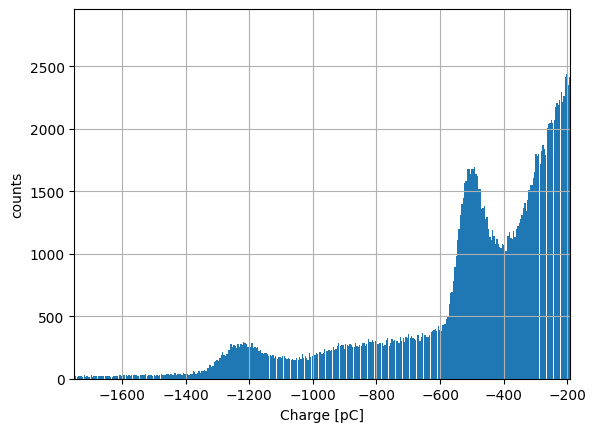

In [16]:
lim_list = [[-1750, -190],  #ch0
            [-1, -1],      #ch1
            [-1000, -175],  #ch2
            [-1000, -145],  #ch3
            [-1000, -165],  #ch4
            [-1000, -175],  #ch5
            [-1000, -155],  #ch6
            [-4000, -180],  #ch7
            [-1000, -170],  #ch8
            [-1000, -160],  #ch9
            [-1000, -120],  #ch10
            [-1000, -165],  #ch11
            [-1, -1],      #ch12
            [-1, -1],      #ch13
            [-1000, -140],  #ch14
            [-1000, -160]   #ch15
            ]


lim_N = lim_list[channel]
#plt.text(centers_N.min() * 0.85, bin_N.max() * 95 / 100, f'{bin_N.sum() = }', fontsize=10, color='black', ha='center',
 #        bbox=dict(facecolor='white', alpha=0.5, edgecolor='blue', boxstyle='round,pad=0.5'))
plt.bar(centers_N, bin_N, width = 4)
plt.xlim(lim_N)
plt.grid()
plt.xlabel("Charge [pC]")
plt.ylabel("counts")

In [17]:
err_N = err_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
bin_N = bin_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]
centers_N = centers_N[np.where((centers_N > lim_N[0]) & (centers_N < lim_N[1]))]

In [18]:
np.where(err_N == 0)

(array([], dtype=int64),)

Picco 1 a -1207.93 pC


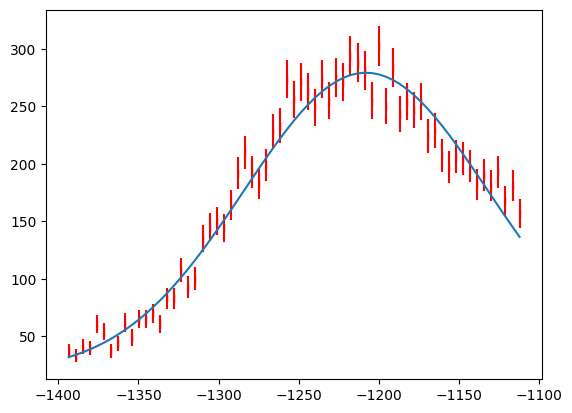

In [39]:
range_1 = [80, 145]
gauss1 = GaussianModel(prefix='g1_')    #Gaussiana
const = ConstantModel(prefix = "c1_")

model2 = gauss1 + const
params = model2.make_params()
params.update(gauss1.guess(bin_N[range_1[0]:range_1[1]], x = centers_N[range_1[0]:range_1[1]]))
params.update(const.guess(bin_N[range_1[0]:range_1[1]], x = centers_N[range_1[0]:range_1[1]]))

result2 = model2.fit(bin_N[range_1[0]:range_1[1]], 
                     params, x = centers_N[range_1[0]:range_1[1]], 
                     weights = 1 / err_N[range_1[0]:range_1[1]])


_ = plt.plot(centers_N[range_1[0]:range_1[1]], result2.best_fit, label='best fit', zorder = 10)
_ = plt.plot(centers_N[range_1[0]:range_1[1]], result2.best_fit, label='best fit', zorder = 10)

_ = plt.errorbar(centers_N[range_1[0]:range_1[1]], 
             bin_N[range_1[0]:range_1[1]], 
             err_N[range_1[0]:range_1[1]], color = "red", fmt='|')

print(f'Picco 1 a {result2.params["g1_center"].value: .2f} pC')

Picco 2 a -87952384093.50 pC


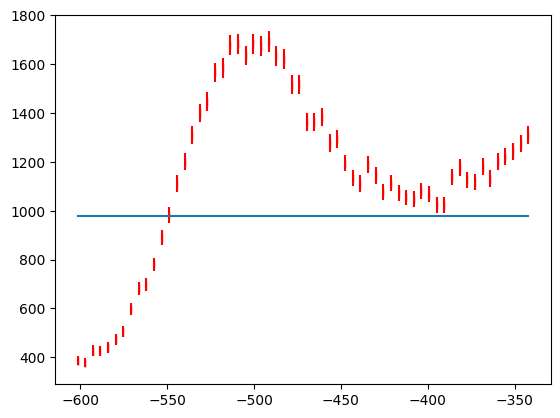

In [37]:
range_2 = [260, 320]
gauss2 = GaussianModel(prefix='g1_')    #Gaussiana
const = ConstantModel(prefix = "c1_")
model3 = gauss2 + const
result3 = model3.fit(bin_N[range_2[0]:range_2[1]], 
                     params, x = centers_N[range_2[0]:range_2[1]], 
                     weights = 1 / err_N[range_2[0]:range_2[1]])


_ = plt.plot(centers_N[range_2[0]:range_2[1]], result3.best_fit, label='best fit', zorder = 10)
_ = plt.errorbar(centers_N[range_2[0]:range_2[1]], 
             bin_N[range_2[0]:range_2[1]], 
             err_N[range_2[0]:range_2[1]], color = "red", fmt='|')

print(f'Picco 2 a {result3.params["g1_center"].value: .2f} pC')